# 자동제어특강

자동제어특강에서 배운 내용을 정리하는 것을 목표로 한다.

## 1. 시스템이란?

**시스템은 크게 상태, 입력, 출력으로 구성된다.**

상태 (𝑥) : 입력을 받아 변화하는 시스템 내부의 변수들 (미분방정식의 해)

입력 (𝑢): 시스템을 외부에서 조작하는 변수 (미분방정식의 우변)

출력 (𝑦) : 관측 가능한 변수 (센서 등으로 실제로 측정 가능한 값들) 

대표적인 역학적 시스템인 매스-스프링-댐퍼 시스템을 수학적으로 모델링하는 과정을 따라가며 더욱 자세히 알아보겠다.

어떤 질량(m)을 가진 물체에 스프링을 연결하고 댐퍼를 통해 충격을 상쇄시킬 수 있도록 하고 거기에 힘(F)를 가할 수 있도록 설계된 시스템을 생각해보자.

### 1.1 상태 변수 
위 시스템에서 질량을 가진 물체의 위치를 ${x}$, 속도는 $\dot{x}$, 가속도는 $\ddot{x}$라고 하면 이들이 바로 시스템의 상태를 나타내는 상태변수들이 된다.
 


### 1.2  미분방정식을 통한 시스템 표현

이제 시스템을 위 상태변수들에 대한 미분방정식으로 표현할 수 있다.

물체에 연결되어 있는 스프링의 스프링 상수를 k, 댐퍼의 감쇠 계수를 c라고 하자.

물체에 힘($F$)가 전달되면 댐퍼와 스프링은 각각 그 반대 방향으로 힘($F_d$, $F_S$)을 만들어낸다.

물체의 가속도는 물체의 질량과 그에 가해지는 전체 힘의 합으로 결정되므로 아래와 같이 수식을 쓸 수 있다.

$$
m\ddot{x} = F - (F_d + F_s)
$$

댐퍼는 감쇠계수와 물체의 속도에 비래하여 저항을 주므로 아래와 같이 다시 쓸 수 있다.
$$
F_d = c\dot{x}
$$

스프링이 가하는 힘은 스프링 상수와 스프링이 늘어난 정도, 즉 물체의 위치에 비례하므로 아래와 같이 쓸 수 있다.
$$
F_S = kx
$$

위 식들을 잘 정리하면 아래의 식을 얻을 수 있다.
$$
m\ddot{x} + c\dot{x} + kx = F
$$


### 1.3 입력

여기서 힘 $F$가 시스템에서의 입력이다.
따라서 위 식은 다시 아래와 같이 최종적으로 주어진다.
$$
m\ddot{x} + c\dot{x} + kx = u(t)
$$

미분방정식의 우변, 즉 입력에 따라 그 방정식의 해 $x$가 변화할 것이이다. 

**상태를 원하는데로 변화시키는 것이 제어이므로 입력을 통해 상태 함수를 원하는 함수(t에 따라 어디로 수렴?)로 바꿀지가 제어의 핵심이라고 할 수 있다.**

매스-스프링-댐퍼 시스템 뿐 아니라 수 많은 시스템들 dc모터, inverted pendulum 등이 미분방정식으로 기술 될 수 있으므로 이를 다루는 것 역시 제어의 핵심이다.



### 1.3 상태방정식
제어공학에서는 시스템의 미분방정식을 상태 공간 모델 (상태방정식)으로 변환하여 사용한다.

위의 매스-스프링-댐퍼 시스템의 미분 방정식을 상태공간 모델로 변환해보자

#### 상태 변수 정의
$$
x_1 = x
$$

$$
x_2 = \dot{x}
$$

#### 상태방정식(state equation)
$$
\begin{bmatrix} 
\dot{x}_1 \\ \dot{x}_2
\end{bmatrix}
=
\begin{bmatrix} 
0 & 1 \\ 
-\frac{k}{m} & -\frac{c}{m} 
\end{bmatrix}
\begin{bmatrix} 
x_1 \\ x_2
\end{bmatrix}
+
\begin{bmatrix} 
0 \\ \frac{1}{m}
\end{bmatrix}
u
$$



## 3. 옵저버

시스템의 상태를 직접 알기 어려운 경우가 있다. dc모터의 회전 수나, 모바일 로봇의 정확한 위치 등은 정확히 알기 어렵다.

하지만 라이다, 휠오도메트리 등의 센서 데이터, DC모터의 전류 등의 출력은 우리가 알 수 있다.


그러므로, 시스템의 출력을 이용해 상태를 추정하는 것이 옵저버의 핵심 개념이다.

출력과 출력추정값의 오차를 피드백해주어 옵저버 방정식을 정의하면 상태 추정 함수($\hat{x}$)는 상태 함수와의 오차가 0이 되게 설계할 수 있다. 

$$ \dot{\hat{x}} = A\hat{x} + Bu + L(y - C\hat{x}) $$


위와 같이 옵저버 방정식을 정의하면 다음과 같은 오차방정식을 유도할 수 있다.

$$
\dot{e} = \dot{x} - \dot{\hat{x}}
$$

$$
\dot{e} = (A x + B u) - (A \hat{x} + B u + L C x - L C \hat{x})
$$

$$
\dot{e} = A x + B u - A \hat{x} - B u - L C x + L C \hat{x}
$$

$$
\dot{e} = A x - A \hat{x} - L C x + L C \hat{x}
$$

$$
\dot{e} = (A - L C)e
$$

#출력과 상태가 맺는 관계 C 매트릭스를 정확히 정의하는 것 역시 중요한 포인트이다. 또한 출력을 감지하는 센서에 노이즈가 포함될 가능성이 높으므로 이를 잘 컨트롤해서 높은 품질의 출력 데이터를 피드백해주어야 한다.이 과정에서 칼만필터 등의 알고리즘을 적용할 수 있다.

**y와 x의 관계를 잘 모사하도록 출력 방정식을 설계하여야 하고 y의 노이즈를 잘 케어할 수 있도록 알고리즘의 적용 고려해야 함** 

### 3.1 옵저버 설계

2차 시스템에서는 L을 잘 정의하여 오차함수의 폴이 좌반 평면에 존재하도록 하는 것이 주 관심사이다. 

inverted pendulum은 4차 시스템이다. 기본은 역시 L을 잘 설계하여 폴이 모두 좌반 평면에 존재하도록 하는 것인데, Routh - Hurwitz 판별법에서 루스 배열의 모든 값이 양수여야 하는 이유도 그에 따른 것이다.

따라서 $det(sI - A +LC) = 0$의 해의 실수부가 모두 0보다 작게하는 L을 선택하면 된다.

원하는 응답 튿성을 갖도록 구체적인 특성방정식과 갖게 만드는 L을 찾아도 좋다.

이렇게 적절한 응답특성을 갖도록 폴을 직접 선택하여 L을 설계하는 방식을 pole place method 방식이라고 한다.


또 다른 L설계 방식으로 최적화 이론이 적용된 **LQR(Linear Quadratic Regulation)** 방법이 있다. 

### 3.1.1 LQR 
비용 함수(Cost Function)를 최소화하도록 \( L \) 을 결정하는 것이 목표이다.

$$
J = \int_0^\infty (e_x^T Q e_x + u^T R u) dt
$$

여기서:
- $Q$ : 상태 추정 오차를 최소화하는 가중치 행렬
- $R$ : 옵저버의 입력 감도를 조절하는 가중치 행렬

LQR 옵저버 게인 \( L \) 은 다음 **리카티 방정식 (Riccati Equation)** 을 풀어 계산된다.

$$
A^T P + P A - P C^T R^{-1} C P + Q = 0
$$

그 후 옵저버 게인은:

$$
L = P C^T R^{-1}
$$

이와 같이 최적화된 옵저버 게인 \( L \) 을 얻을 수 있다.

---

#### \( R \) 값의 의미 및 옵저버의 입력 민감성
**\( R \) 값이 작은 경우**
- 옵저버가 입력 \( u \) 에 **민감하게 반응**한다.
- 빠른 응답을 가지지만, **센서 노이즈에도 민감**하여 불안정할 수 있다.

**\( R \) 값이 큰 경우**
- 옵저버가 입력 \( u \) 를 덜 신뢰하고, **출력 \( y \) 를 더 신뢰**한다.
- 하지만, **응답 속도가 너무 느려질 수 있음**.
  
#### 옵저버가 입력 U에 대해 민감하다의 의미
- 작은 입력 변화에도(노이즈 등) $\hat{x}$이 매우 빠르게 민감하게 변화함.
- 예를들어 노이즈가 포함된 입력에 대한 상태, 즉 실제 상태를 X1, 노이즈가 포함되지 않은 입력에 대한 상태를 X2라고 하자. 옵저버 즉 $\hat{x}$은 노이즈가 포함되지 않은 입력으로 계산되기에 X2에 수렴할테니 $\hat{x}$이 너무 빠르게 x2에 수렴하면 x1과의 오차가 누적된다. 따라서 u의 작은 변화에 대해 $\hat{x}$이 원래의 특성을 유지하며 적당한 속도로 수렴하도록 만들면 보다 강인한 옵저버를 만들 수 있다.

#### \( R \) 값을 적절하게 조절하는 중요성
- \( R \) 값을 너무 작게 하면 **빠르지만 노이즈에 취약**한 옵저버가 됨.
- \( R \) 값을 너무 크게 하면 **안정적이지만 반응이 둔한** 옵저버가 됨.
- 따라서 **실제 시스템의 요구 사항에 따라 \( R \) 값을 적절하게 조절하는 것이 중요**하다



### 3.1.2 inverted pendulum 시스템의 옵저버 설계 예제
Q와 R 값(MATRIX)은 임의로 설정한 채로 LQR 방식을 적용하여 옵저버를 시뮬레이션 하는 코드와 폴배치법을 이용한 코드 두 가지를 제시한다.

폴배치법의 경우 시뮬레이션 편의상 노이즈는 포함시키지 않았다.

펜듈럼을 정상 상태로 만드는 제어기 (LQR 방식 적용)함께 시뮬레이션 되도록 설계하였다.

컨트롤러의 리카티 방정식과 옵저버의 리카티 방정식은 분리하여 계산해 주어야 한다.

y에 노이즈 추가 코드
```python
+ np.random.normal(0, 0.01, (1, 1))
```

In [52]:
!pip install matplotlib


In [53]:
!pip install scipy


폴 배치법 적용

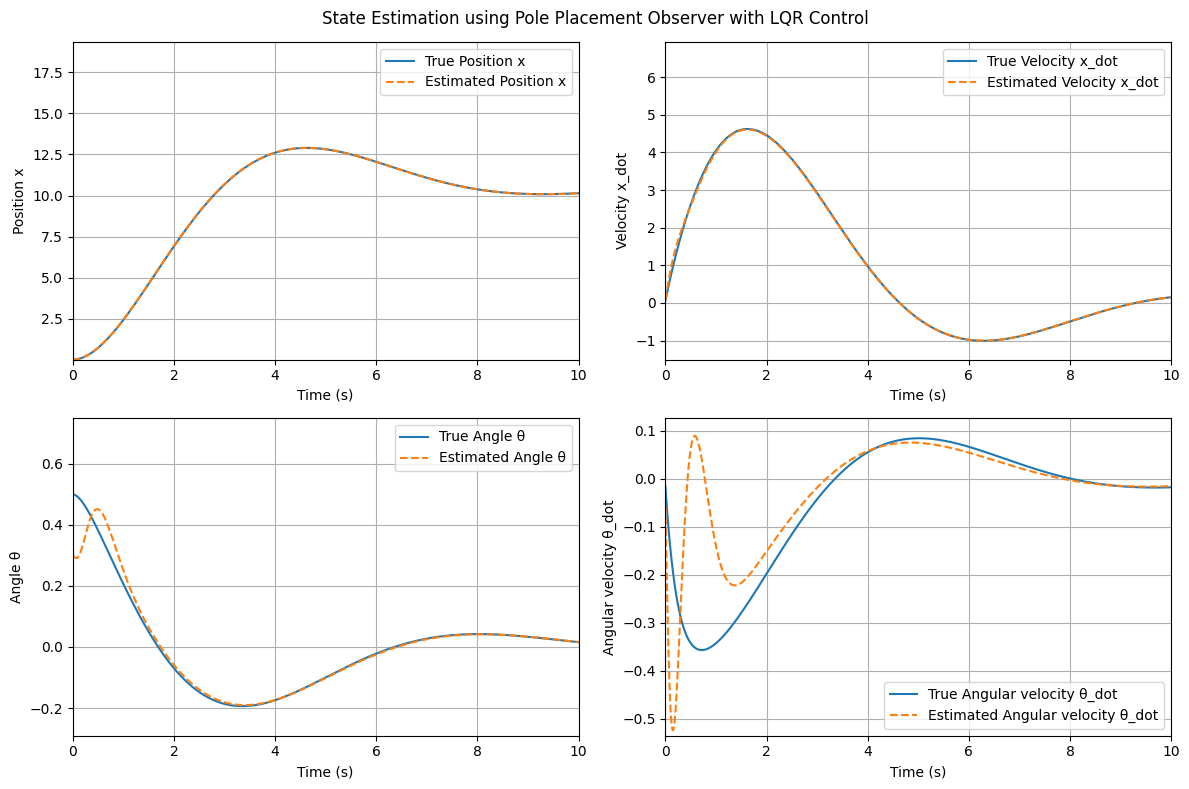

In [54]:
import numpy as np
import scipy.linalg
import scipy.signal
import matplotlib.pyplot as plt

# 시스템 매트릭스 정의
A = np.array([[0, 1, 0, 0],
              [0, 0, -9.8, 0],
              [0, 0, 0, 1],
              [0, 0, 19.6, 0]])

B = np.array([[0], [1], [0], [-1]])

C = np.array([[1, 0, 0, 0]])  # 위치 측정

# 🔹 LQR 게인 계산 (제어기 용)
Q = 10 * np.eye(4)
R = np.array([[1]])  

# 🔹 리카티 방정식 풀이 (Scipy 사용)
P = scipy.linalg.solve_continuous_are(A, B, Q, R)

# 상태 피드백 제어기 게인 K 계산
K = np.linalg.inv(R + B.T @ P @ B) @ B.T @ P @ A  

# 🔹 옵저버 게인 L을 폴 배치 방식으로 설계
observer_poles = np.array([-5+3j,-5-3j,-7,-8])  # 옵저버 폴 선택
L = scipy.signal.place_poles(A.T, C.T, observer_poles).gain_matrix.T

# 룬지-쿠타 4차 (RK4) 적용
def rk4_step(f, x, u, dt, y=None):
    if y is not None:  
        k1 = f(x, u, y)
        k2 = f(x + dt * k1 / 2, u, y)
        k3 = f(x + dt * k2 / 2, u, y)
        k4 = f(x + dt * k3, u, y)
    else:
        k1 = f(x, u)
        k2 = f(x + dt * k1 / 2, u)
        k3 = f(x + dt * k2 / 2, u)
        k4 = f(x + dt * k3, u)

    return x + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

# 시스템 동역학 정의 (제어기 포함)
def system_dynamics(x, u):
    return A @ x + B @ u

# 옵저버 동역학 정의
def observer_dynamics(x_hat, u, y):
    return A @ x_hat + B @ u + L @ (y - C @ x_hat)

# 시뮬레이션 설정
dt = 0.01
T = 10
N = int(T / dt)

# 🔹 초기 상태 설정 (더 현실적인 값)
x = np.array([[0], [0], [0.5], [0]])  
x_hat = np.array([[0], [0], [0.3], [0]])  # 옵저버 초기값

# 상태 기록용 배열
x_history = []
x_hat_history = []
u_history = []

# 시뮬레이션 루프
for i in range(N):
    u = -K @ x  

    x = rk4_step(system_dynamics, x, u, dt)

    y = C @ x

    x_hat = rk4_step(observer_dynamics, x_hat, u, dt, y=y)

    x_history.append(x.flatten())
    x_hat_history.append(x_hat.flatten())
    u_history.append(u.flatten())

# NumPy 배열 변환
x_history = np.array(x_history)
x_hat_history = np.array(x_hat_history)
u_history = np.array(u_history)

# 🔹 그래프 개선: 더 넓은 범위에서 표시
plt.figure(figsize=(12, 8))

labels = ["Position x", "Velocity x_dot", "Angle θ", "Angular velocity θ_dot"]
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(np.linspace(0, T, len(x_history)), x_history[:, i], label="True " + labels[i])
    plt.plot(np.linspace(0, T, len(x_hat_history)), x_hat_history[:, i], '--', label="Estimated " + labels[i])
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel(labels[i])
    plt.grid()

    plt.xlim([0, T])  
    plt.ylim([x_history[:, i].min() * 1.5, x_history[:, i].max() * 1.5])  

plt.suptitle("State Estimation using Pole Placement Observer with LQR Control")
plt.tight_layout()
plt.show()



LQR 방식 적용

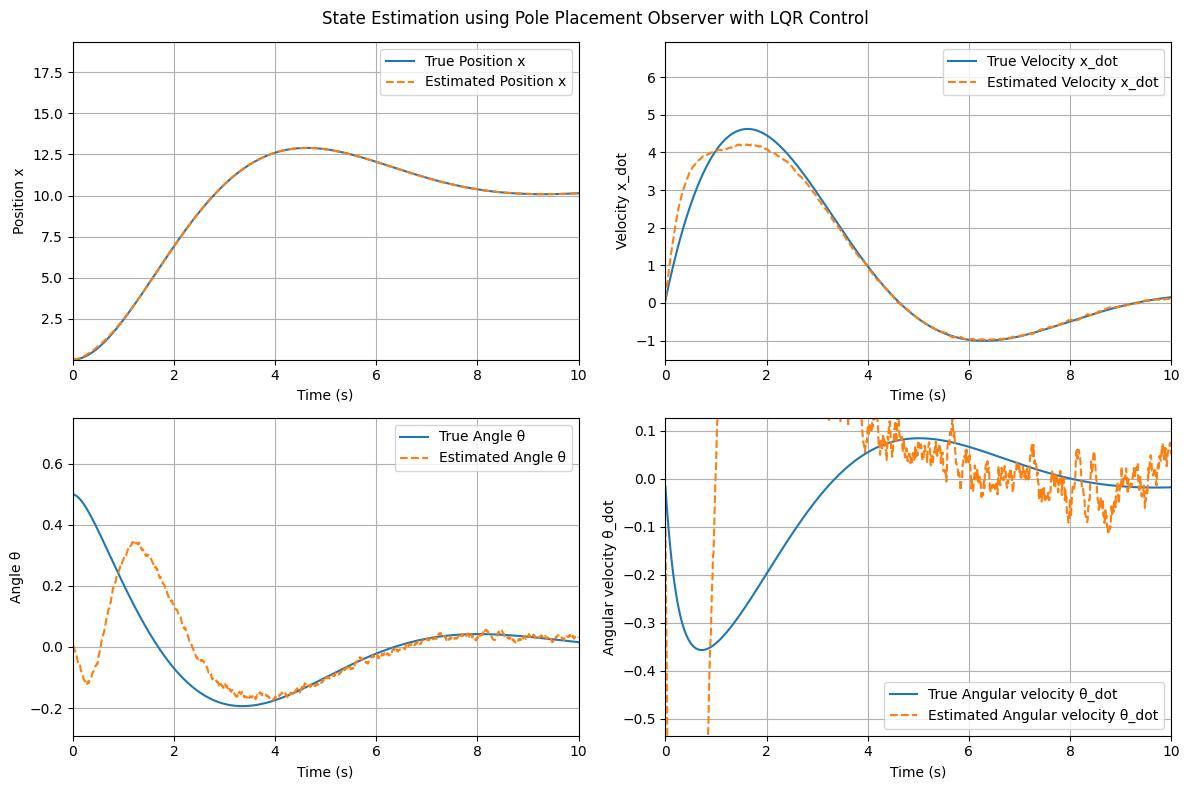

In [77]:


import numpy as np
import scipy.linalg
import scipy.signal
import matplotlib.pyplot as plt

# 시스템 매트릭스 정의
A = np.array([[0, 1, 0, 0],
              [0, 0, -9.8, 0],
              [0, 0, 0, 1],
              [0, 0, 19.6, 0]])

B = np.array([[0], [1], [0], [-1]])

C = np.array([[1, 0, 0, 0]])  # 위치 측정

# 🔹 컨트롤러 최적화 (LQR)
Q_control = 10 * np.eye(4)  
R_control = np.array([[1]])

P_control = scipy.linalg.solve_continuous_are(A, B, Q_control, R_control)
K = np.linalg.inv(R_control + B.T @ P_control @ B) @ B.T @ P_control @ A  

# 🔹 옵저버 최적화 (Kalman Filter 방식)
Q_observer = np.diag([1, 1, 200, 500])  
R_observer = np.array([[10]])  

P_observer = scipy.linalg.solve_continuous_are(A.T, C.T, Q_observer, R_observer)
L = P_observer @ C.T @ np.linalg.inv(R_observer)

# 룬지-쿠타 4차 (RK4) 적용
def rk4_step(f, x, u, dt, y=None):
    if y is not None:  
        k1 = f(x, u, y)
        k2 = f(x + dt * k1 / 2, u, y)
        k3 = f(x + dt * k2 / 2, u, y)
        k4 = f(x + dt * k3, u, y)
    else:
        k1 = f(x, u)
        k2 = f(x + dt * k1 / 2, u)
        k3 = f(x + dt * k2 / 2, u)
        k4 = f(x + dt * k3, u)

    return x + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

# 시스템 동역학 정의 (제어기 포함)
def system_dynamics(x, u):
    return A @ x + B @ u

# 옵저버 동역학 정의
def observer_dynamics(x_hat, u, y):
    return A @ x_hat + B @ u + L @ (y - C @ x_hat)

# 시뮬레이션 설정
dt = 0.01
T = 10
N = int(T / dt)

# 초기 상태 설정
x = np.array([[0], [0], [0.5], [0]])  
x_hat = np.zeros((4, 1))  

# 상태 기록용 배열
x_history = []
x_hat_history = []
u_history = []

# 시뮬레이션 루프
for i in range(N):
    u = -K @ x  

    x = rk4_step(system_dynamics, x, u, dt)

    y = C @ x + np.random.normal(0, 0.01, (1, 1))

    x_hat = rk4_step(observer_dynamics, x_hat, u, dt, y=y)

    x_history.append(x.flatten())
    x_hat_history.append(x_hat.flatten())
    u_history.append(u.flatten())
# NumPy 배열 변환
x_history = np.array(x_history)
x_hat_history = np.array(x_hat_history)
u_history = np.array(u_history)

# 🔹 그래프 개선: 더 넓은 범위에서 표시
plt.figure(figsize=(12, 8))

labels = ["Position x", "Velocity x_dot", "Angle θ", "Angular velocity θ_dot"]
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(np.linspace(0, T, len(x_history)), x_history[:, i], label="True " + labels[i])
    plt.plot(np.linspace(0, T, len(x_hat_history)), x_hat_history[:, i], '--', label="Estimated " + labels[i])
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel(labels[i])
    plt.grid()

    plt.xlim([0, T])  
    plt.ylim([x_history[:, i].min() * 1.5, x_history[:, i].max() * 1.5])  

plt.suptitle("State Estimation using Pole Placement Observer with LQR Control")
plt.tight_layout()
plt.show()




LQR 방법에서 Q = (a, b, c ,d)에서 c와 d는 x3와 x4 값에 대한 것 c, d값을 키울 수록 응답이 보다 빠르게 수렴

R 값을 줄이면 응답 속도 빨라짐



# LQR과 폴 배치법 비교 및 선택 기준

LQR(Linear Quadratic Regulator)과 폴 배치법(Pole Placement) 두 방법의 차이점을 정리하고, 어떤 경우에 어떤 방식을 적용하는 것이 좋은지 살펴본다.

---

## 1. LQR이 유리한 경우

### 1.1 고차 시스템에서의 사용

고차 시스템에서는 응답 특성을 일일이 조정하는 것이 어렵다. 폴 배치법을 사용하려면 모든 폴을 적절히 배치해야 하지만, 시스템 차수가 높아지면 폴의 개수가 많아져 튜닝이 매우 복잡해진다.  
반면, LQR은 Q, R 값을 설정하면 최적 상태 피드백 게인을 자동으로 계산하므로 고차 시스템에서 매우 유용하다.

**적용 예시**  
- 로봇 제어 시스템 (자율주행, 드론 자세 제어)  
- 공정 제어 시스템 (화학 공정, 발전소 제어)  

---

### 1.2 노이즈가 포함된 시스템에서의 사용

LQR은 비용 함수를 최소화하는 방식으로 최적 제어기를 설계한다. 이를 통해 제어 입력을 최소화하면서도 시스템 응답이 최적화되므로 센서 노이즈나 외란에 강한 특성을 가진다.  
반면, 폴 배치법은 단순히 원하는 폴을 배치하는 방식이므로 노이즈를 고려하는 기능이 없다. 따라서 잡음이 포함된 환경에서는 LQR이 더 적절한 선택이 될 수 있다.

**적용 예시**  
- 센서 노이즈가 존재하는 로봇 제어  
- 외란이 고려되어야 하는 공정 시스템  

---

## 2. 폴 배치법이 유리한 경우

### 2.1 비선형 시스템을 선형 근사하여 사용할 경우

비선형 시스템을 선형 근사할 경우, LQR은 사용할 수 있지만 최적의 성능을 보장하지 못할 가능성이 있다.  
특정한 응답 특성을 원할 경우, 폴 배치법을 사용하면 폴을 직접 조정하여 원하는 응답을 얻을 수 있다.

**적용 예시**  
- 인버티드 펜듈럼과 같은 비선형 시스템을 선형 근사한 경우  
- 로봇 시스템의 선형 근사 모델을 제어할 경우  

---

### 2.2 저차 시스템에서의 사용

저차 시스템에서는 폴이 몇 개 되지 않으므로 직접 배치하는 것이 쉽고 직관적이다.  
폴을 원하는 위치로 설정하여 오버슈트, 응답 속도 등을 직접 조정할 수 있으므로 폴 배치법이 적합하다.  
반면, LQR은 개별 응답 특성을 직접 조정하기 어렵기 때문에, 저차 시스템에서는 굳이 사용할 필요가 없는 경우도 많다.

**적용 예시**  
- 서보 모터 속도 제어  
- 단순한 1자유도 로봇 시스템 제어  

---

## 3. LQR과 폴 배치법 비교

| 구분 | LQR | 폴 배치법 |
|------|------|------|
| 설계 방식 | 비용 함수 최소화 | 원하는 폴을 직접 배치 |
| 고차 시스템 | 적합 | 부적합 |
| 노이즈 대응 | 강함 | 취약함 |
| 응답 속도 및 오버슈트 조절 | 직접 조정 어려움 | 직접 조정 가능 |
| 비선형 시스템 | 선형 근사 시 성능 저하 가능 | 선형 근사 후 폴 배치 가능 |
| 적용 대상 | 고차 시스템, 최적 성능이 중요한 경우 | 저차 시스템, 응답 특성을 직접 조절할 경우 |

---

## 4. 결론

- 고차 시스템에서는 LQR이 유리하다. 응답 조정이 어렵고, 자동으로 최적 게인을 계산할 수 있다.  
- 노이즈가 고려되어야 하는 경우 LQR이 유리하다. 잡음과 외란에 강한 제어가 가능하다.  
- 비선형 시스템을 선형 근사할 경우, 폴 배치법이 유리할 수 있다. 특정 응답을 직접 조정할 수 있기 때문이다.  
- 저차 시스템에서는 폴 배치법이 유리하다. 폴을 직접 조정하여 원하는 응답을 쉽게 얻을 수 있다.  

---

이제 시스템의 특성에 맞게 LQR과 폴 배치법을 적절히 선택할 수 있다.